## 시계열 데이터
- 한글 헤더 읽기 EUC_KR

In [105]:
import matplotlib.pyplot as plt

In [2]:
with open("data.csv", "rt", encoding="EUC_KR") as fr:
    lines = fr.readlines()

n_lines = ["연,월,일,기온,품질,균질\n"] + lines[5:]
n_lines = map(lambda v: v.replace('/', ','), n_lines)
result = "".join(n_lines).strip()

with open("new_data.csv", "wt", encoding="utf-8") as fw:
    fw.write(result)

In [88]:
import pandas as pd
df = pd.read_csv('new_data.csv', encoding="utf-8")
df.shape

(4018, 6)

### 일별 평균 기온

In [6]:
# 날짜별 기온을 리스트에 넣기 ---(*2)
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['월']), int(row['일']), float(row['기온']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 날짜별 평균 구하기 ---(*3)
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [7]:
avs["11/4"]

15.281818181818181

### 월별 평균 기온

In [8]:
import matplotlib.pyplot as plt
g = df.groupby(['월'])["기온"]
gg = g.sum() / g.count()
# 결과 출력하기 ---(*3)
print(gg)
gg.plot()
plt.savefig("tem-month-avg.png")
plt.show()

월
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 기온, dtype: float64


<Figure size 640x480 with 1 Axes>

### 머신러닝을 이용한 예측
- 2015년 이전 데이터로 학습
- 2016년 데이터로 테스트
- 이전 n일의 데이터를 기반으로 다음날 기온을 예측
- 선형 모델 사용

In [92]:
from sklearn.linear_model import LinearRegression

train_year_bool = (df["연"] <= 2014)
test_year_bool = (df["연"] >= 2015)

In [93]:
def make_data(data, n_steps):
    x = []
    y = []
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < n_steps: continue
        y.append(temps[i])
        xa = []
        for p in range(n_steps):
            d = i + p - n_steps
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

In [134]:
n_steps = 3
train_x, train_y = make_data(df[train_year_bool], n_steps)
test_x, test_y = make_data(df[test_year_bool], n_steps)

In [135]:
len(train_x), len(test_x)

(3284, 728)

In [136]:
len(train_y), len(test_y)

(3284, 728)

In [137]:
train_x

[[3.6, 4.0, 3.7],
 [4.0, 3.7, 4.0],
 [3.7, 4.0, 3.6],
 [4.0, 3.6, 2.1],
 [3.6, 2.1, 2.8],
 [2.1, 2.8, 4.2],
 [2.8, 4.2, 3.7],
 [4.2, 3.7, 4.3],
 [3.7, 4.3, 6.1],
 [4.3, 6.1, 6.1],
 [6.1, 6.1, 4.0],
 [6.1, 4.0, 6.6],
 [4.0, 6.6, 10.7],
 [6.6, 10.7, 9.0],
 [10.7, 9.0, 8.0],
 [9.0, 8.0, 5.6],
 [8.0, 5.6, 4.2],
 [5.6, 4.2, 4.0],
 [4.2, 4.0, 1.3],
 [4.0, 1.3, 3.1],
 [1.3, 3.1, 2.5],
 [3.1, 2.5, 4.4],
 [2.5, 4.4, 5.5],
 [4.4, 5.5, 6.0],
 [5.5, 6.0, 6.8],
 [6.0, 6.8, 5.5],
 [6.8, 5.5, 6.0],
 [5.5, 6.0, 8.4],
 [6.0, 8.4, 7.1],
 [8.4, 7.1, 5.7],
 [7.1, 5.7, 7.8],
 [5.7, 7.8, 6.0],
 [7.8, 6.0, 1.6],
 [6.0, 1.6, 1.9],
 [1.6, 1.9, 2.0],
 [1.9, 2.0, 3.6],
 [2.0, 3.6, 7.9],
 [3.6, 7.9, 4.6],
 [7.9, 4.6, 5.6],
 [4.6, 5.6, 7.5],
 [5.6, 7.5, 4.6],
 [7.5, 4.6, 5.7],
 [4.6, 5.7, 10.5],
 [5.7, 10.5, 14.1],
 [10.5, 14.1, 7.5],
 [14.1, 7.5, 7.0],
 [7.5, 7.0, 4.4],
 [7.0, 4.4, 7.0],
 [4.4, 7.0, 6.4],
 [7.0, 6.4, 8.0],
 [6.4, 8.0, 10.8],
 [8.0, 10.8, 11.2],
 [10.8, 11.2, 6.5],
 [11.2, 6.5, 7.8],
 [6.5, 7.8, 7

In [102]:
train_x[:10], train_y[:10]

([[3.6, 4.0, 3.7],
  [4.0, 3.7, 4.0],
  [3.7, 4.0, 3.6],
  [4.0, 3.6, 2.1],
  [3.6, 2.1, 2.8],
  [2.1, 2.8, 4.2],
  [2.8, 4.2, 3.7],
  [4.2, 3.7, 4.3],
  [3.7, 4.3, 6.1],
  [4.3, 6.1, 6.1]],
 [4.0, 3.6, 2.1, 2.8, 4.2, 3.7, 4.3, 6.1, 6.1, 4.0])

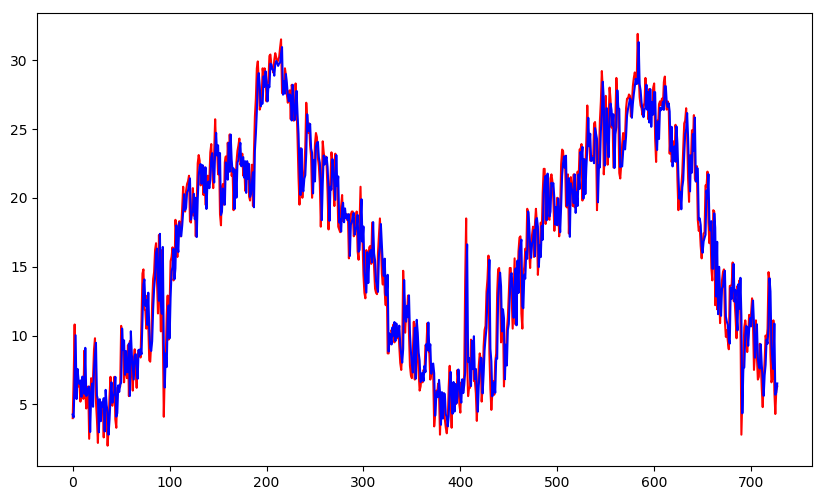

In [106]:
# 학습하기
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 학습하기
pred_y = lr.predict(test_x) # 예측하기

# 결과를 그래프로 그리기
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pred_y, c='b')
plt.show()

In [107]:
diff_y = abs(pred_y  - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))
lr.score(test_x, test_y)

average= 1.593865458592961
max= 8.61016351089566


0.9293183717062963

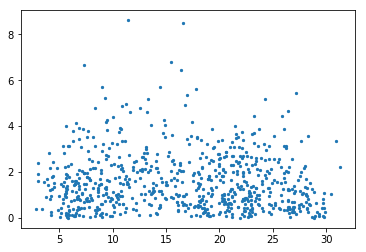

In [109]:
plt.scatter(pred_y, diff_y, s=5)

In [111]:
for i in range(1,12):
    train_x, train_y = make_data(df[train_year_bool], i)
    test_x, test_y = make_data(df[test_year_bool], i)
    lr = LinearRegression(normalize=True)
    lr.fit(train_x, train_y) # 학습하기
    print(i, lr.score(test_x, test_y))

1 0.9257366007517821
2 0.9260524488260999
3 0.9293183717062963
4 0.9300100521310327
5 0.9306790722959295
6 0.9317681246004814
7 0.9325231028823756
8 0.9332761498430309
9 0.9330517095414509
10 0.9331164128662479
11 0.9329797213896361


In [112]:
lr.coef_, lr.intercept_

(array([ 0.01895918,  0.03586988,  0.02331331,  0.01230416,  0.0408877 ,
         0.04192212,  0.0270933 ,  0.01197307,  0.1054505 , -0.15462743,
         0.82406629]), 0.21532139783079174)

## MLP 사용

In [12]:
series = df["기온"]

In [145]:
from numpy import array
def split_sequence(sequence, n_steps):
  X, y = [], []
  sequence = list(sequence)
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
     break
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [146]:
train_year_bool = (df["연"] <= 2014)
test_year_bool = (df["연"] >= 2015)

In [147]:
train_s = df[train_year_bool]["기온"]
train_x, train_y = split_sequence(train_s, n_steps)
test_s = df[train_year_bool]["기온"]
test_x, test_y = split_sequence(test_s, n_steps)

In [148]:
train_x[:10], train_y[:10]

(array([[3.6, 4. , 3.7],
        [4. , 3.7, 4. ],
        [3.7, 4. , 3.6],
        [4. , 3.6, 2.1],
        [3.6, 2.1, 2.8],
        [2.1, 2.8, 4.2],
        [2.8, 4.2, 3.7],
        [4.2, 3.7, 4.3],
        [3.7, 4.3, 6.1],
        [4.3, 6.1, 6.1]]),
 array([4. , 3.6, 2.1, 2.8, 4.2, 3.7, 4.3, 6.1, 6.1, 4. ]))

In [149]:
train_x=train_x.reshape(-1,n_steps,1)
test_x=test_x.reshape(-1,n_steps,1)

In [151]:
train_x[:10], train_y[:10]

(array([[[3.6],
         [4. ],
         [3.7]],
 
        [[4. ],
         [3.7],
         [4. ]],
 
        [[3.7],
         [4. ],
         [3.6]],
 
        [[4. ],
         [3.6],
         [2.1]],
 
        [[3.6],
         [2.1],
         [2.8]],
 
        [[2.1],
         [2.8],
         [4.2]],
 
        [[2.8],
         [4.2],
         [3.7]],
 
        [[4.2],
         [3.7],
         [4.3]],
 
        [[3.7],
         [4.3],
         [6.1]],
 
        [[4.3],
         [6.1],
         [6.1]]]), array([4. , 3.6, 2.1, 2.8, 4.2, 3.7, 4.3, 6.1, 6.1, 4. ]))

In [157]:
for i in range(10):
  print(train_x[i], train_y[i])

[[3.6]
 [4. ]
 [3.7]] 4.0
[[4. ]
 [3.7]
 [4. ]] 3.6
[[3.7]
 [4. ]
 [3.6]] 2.1
[[4. ]
 [3.6]
 [2.1]] 2.8
[[3.6]
 [2.1]
 [2.8]] 4.2
[[2.1]
 [2.8]
 [4.2]] 3.7
[[2.8]
 [4.2]
 [3.7]] 4.3
[[4.2]
 [3.7]
 [4.3]] 6.1
[[3.7]
 [4.3]
 [6.1]] 6.1
[[4.3]
 [6.1]
 [6.1]] 4.0


In [162]:
# define model
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_steps,1))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [163]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 3, 100)            200       
_________________________________________________________________
dense_27 (Dense)             (None, 3, 1)              101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [164]:
train_x.shape

(3284, 3, 1)

In [165]:
# fit model
model.fit(train_x, train_y, epochs=5, verbose=0)

ValueError: Error when checking target: expected dense_27 to have 3 dimensions, but got array with shape (3284, 1)

In [49]:
yhat = model.predict(test_x, verbose=0)
yhat[:10]
# model.score(test_x, test_y)

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (3284, 3, 1)